In [1]:
import time
start_time=time.time()

In [2]:
from astropy.table import Table
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#matplotlib inline
sns.set_color_codes()
#from sabreMod import sosf,sosfh
from scipy import interpolate

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

In [3]:
nom_reg='Lag'

In [4]:
damiani_tab1_file = "Obs/J_A+A_604_A135_table2.dat.fits"
tab = Table.read(damiani_tab1_file)
tab
df = tab.to_pandas()
df.describe()

,RAdeg,DEdeg,RVHalpha,sigHalpha,NormHalpha,RV[NII]6584,sig[NII]6584,Norm[NII]6584,RV[SII]6717,sig[SII]6717,Norm[SII]6717,RV[SII]6731,sig[SII]6731,Norm[SII]6731
count,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000
mean,271.110700,-24.332642,-6.258445,13.711606,56980.737850,-3.934894,11.655811,10499.992090,-3.204393,11.567137,2044.263891,-2.989252,11.512982,1639.080833
std,0.164268,0.105422,2.742485,1.677870,56029.717118,3.240030,1.140301,10622.170782,3.345863,1.205795,1687.371379,3.328345,1.229661,1718.881796
min,270.544500,-24.566860,-13.550000,11.890000,1612.260000,-11.440000,3.990000,651.350000,-12.450000,3.590000,217.730000,-12.480000,8.960000,163.940000
25%,271.010500,-24.406500,-8.460000,13.160000,24079.470000,-5.950000,10.870000,5686.930000,-5.440000,10.730000,1197.130000,-5.260000,10.620000,889.610000
50%,271.110600,-24.344670,-6.370000,13.550000,41640.680000,-3.950000,11.530000,8211.000000,-3.190000,11.450000,1622.020000,-2.980000,11.380000,1223.920000
75%,271.211600,-24.256500,-4.450000,14.030000,69764.840000,-1.900000,12.310000,11584.220000,-1.180000,12.250000,2273.270000,-0.960000,12.230000,1750.890000
max,271.606600,-24.054330,2.840000,64.590000,589418.530000,8.010000,18.520000,125752.930000,10.100000,17.240000,17676.600000,10.120000,17.550000,20417.110000


In [5]:
m=df['sigHalpha'] < df['sigHalpha'].mean()+4*df['sigHalpha'].std()

In [6]:
df=df[m]

<ipython-input-7-15740d443dac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.pairplot(df[m],


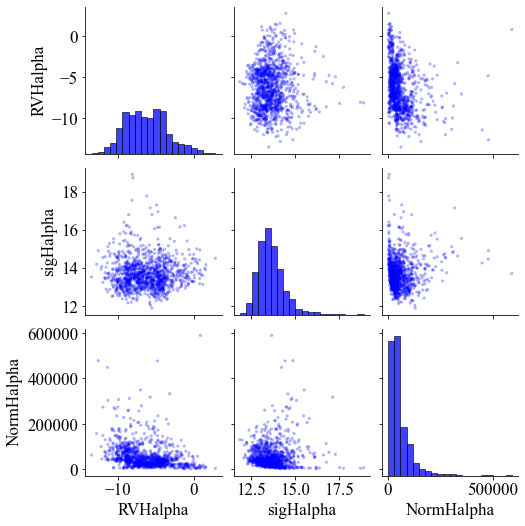

In [7]:
sns.pairplot(df[m],
             vars=["RVHalpha", "sigHalpha", "NormHalpha"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="blue"),
             diag_kws=dict(bins=20, color="blue"),
            )

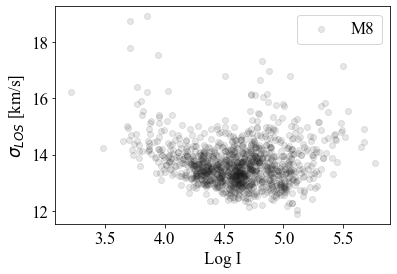

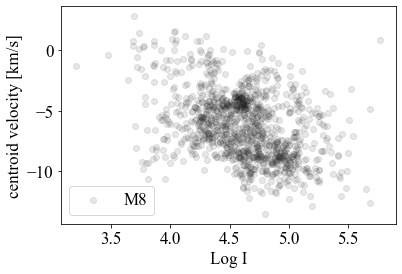

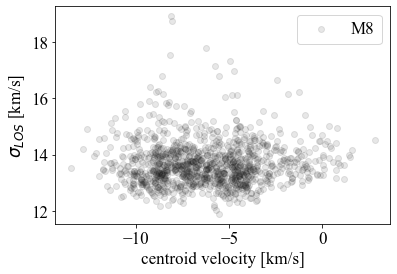

In [8]:
fig, ax = plt.subplots()
plt.scatter(np.log10(df.NormHalpha),df.sigHalpha, alpha=0.1, color='k', label='M8')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(df.NormHalpha),df.RVHalpha, alpha=0.1, color='k', label='M8')

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(df.RVHalpha,df.sigHalpha, alpha=0.1, color='k', label='M8')

ax.set_ylabel('$σ_{LOS}$ [km/s]')
ax.set_xlabel('centroid velocity [km/s]')
plt.legend()

plt.rcParams["font.size"]="17"

Structure Function

In [9]:
df.describe()

,RAdeg,DEdeg,RVHalpha,sigHalpha,NormHalpha,RV[NII]6584,sig[NII]6584,Norm[NII]6584,RV[SII]6717,sig[SII]6717,Norm[SII]6717,RV[SII]6731,sig[SII]6731,Norm[SII]6731
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,271.110701,-24.332602,-6.257440,13.668342,56579.890731,-3.929209,11.662330,10508.154413,-3.199966,11.565697,2044.058087,-2.985740,11.510332,1638.544439
std,0.164338,0.105458,2.743435,0.782749,54338.950357,3.235531,1.118632,10622.996539,3.343837,1.205296,1688.074478,3.327578,1.226816,1719.514527
min,270.544500,-24.566860,-13.550000,11.890000,1612.260000,-11.440000,8.600000,651.350000,-12.450000,3.590000,217.730000,-12.480000,8.960000,163.940000
25%,271.010475,-24.406590,-8.462500,13.160000,24060.892500,-5.942500,10.870000,5690.635000,-5.432500,10.727500,1197.040000,-5.252500,10.620000,888.072500
50%,271.110750,-24.344500,-6.365000,13.545000,41627.050000,-3.945000,11.530000,8217.420000,-3.185000,11.445000,1621.685000,-2.980000,11.375000,1222.295000
75%,271.211650,-24.256500,-4.450000,14.030000,69520.437500,-1.900000,12.310000,11584.360000,-1.177500,12.250000,2272.107500,-0.957500,12.222500,1747.320000
max,271.606600,-24.054330,2.840000,18.910000,589418.530000,8.010000,18.520000,125752.930000,10.100000,17.240000,17676.600000,10.120000,17.550000,20417.110000


In [10]:
df2 = df[['RAdeg', 'DEdeg', 'RVHalpha']].copy()
df2.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'RVHalpha' : 'RV'}, inplace = True)
df2.describe()

,X,Y,RV
count,1176.000000,1176.000000,1176.000000
mean,271.110701,-24.332602,-6.257440
std,0.164338,0.105458,2.743435
min,270.544500,-24.566860,-13.550000
25%,271.010475,-24.406590,-8.462500
50%,271.110750,-24.344500,-6.365000
75%,271.211650,-24.256500,-4.450000
max,271.606600,-24.054330,2.840000


In [11]:
data=df2

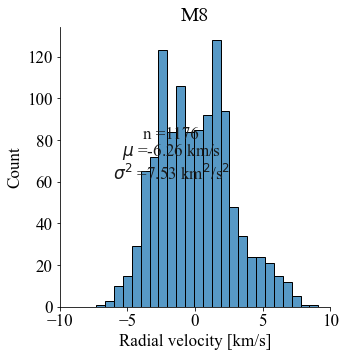

In [12]:
#fig, ax = plt.subplots()

sns.displot(data.RV-data.RV.mean(),bins=25)
plt.xlim(-10,10)


plt.text(0.35, 0.86,'n ='+str(data.RV.count()), ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.35, 0.78,'$μ$ ='+str(np.round(data.RV.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.35, 0.68,'$σ^{2}$ ='+str(np.round(data.RV.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('M8')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

plt.xlabel('Radial velocity [km/s]')
plt.savefig('Hist//M8.pdf', bbox_inches='tight')

In [13]:
df3=df2

In [14]:


df1 = pd.DataFrame(
    {'RA': df.RAdeg, 'DE': df.DEdeg, 'V': df.RVHalpha, '_key': 1}
)


df1.describe()



,RA,DE,V,_key
count,1176.000000,1176.000000,1176.000000,1176.0
mean,271.110701,-24.332602,-6.257440,1.0
std,0.164338,0.105458,2.743435,0.0
min,270.544500,-24.566860,-13.550000,1.0
25%,271.010475,-24.406590,-8.462500,1.0
50%,271.110750,-24.344500,-6.365000,1.0
75%,271.211650,-24.256500,-4.450000,1.0
max,271.606600,-24.054330,2.840000,1.0


In [15]:
df2 = df1.copy()

In [16]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA        DE     V       RA_       DE_    V_
0 0  271.0562 -24.10769 -4.44  271.0562 -24.10769 -4.44
  1  271.0562 -24.10769 -4.44  271.0348 -24.18544 -8.67
  2  271.0562 -24.10769 -4.44  271.0433 -24.22119 -2.41
  3  271.0562 -24.10769 -4.44  271.1592 -24.23067 -7.78
  4  271.0562 -24.10769 -4.44  271.1480 -24.11269 -5.75

In [17]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

/Users/will/miniconda3/envs/science/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
pairs = pairs[(pairs.dDE > 0.0) & (pairs.dRA > 0.0)]

In [19]:
pairs.head()

RA        DE     V       RA_       DE_    V_      dDE         dRA  \
0 1   271.0562 -24.10769 -4.44  271.0348 -24.18544 -8.67  279.900   70.299156   
  2   271.0562 -24.10769 -4.44  271.0433 -24.22119 -2.41  408.600   42.370665   
  16  271.0562 -24.10769 -4.44  270.9704 -24.33131 -4.73  805.032  281.692552   
  17  271.0562 -24.10769 -4.44  271.0009 -24.28103  0.48  624.024  181.592905   
  18  271.0562 -24.10769 -4.44  270.9405 -24.30600 -9.93  713.916  379.895870   

               s     log_s    dV      dV2   log_dV2  VV_mean  
0 1   288.593107  2.460286  4.23  17.8929  1.252681   -6.555  
  2   410.790985  2.613621 -2.03   4.1209  0.614992   -3.425  
  16  852.893437  2.930895  0.29   0.0841 -1.075204   -4.585  
  17  649.909175  2.812853 -4.92  24.2064  1.383930   -1.980  
  18  808.700765  2.907788  5.49  30.1401  1.479145   -7.185

In [20]:
pairs.describe()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
count,352932.000000,352932.000000,352932.000000,352932.000000,352932.000000,352932.000000,352932.000000,352932.000000,352932.000000,352932.000000,352932.000000,352932.000000,3.529320e+05,352932.000000
mean,271.216265,-24.271448,-5.452472,271.037117,-24.393660,-7.054347,439.961395,587.682256,807.136591,2.827075,1.601875,15.156871,-inf,-6.253410
std,0.135332,0.091348,2.747379,0.125005,0.083801,2.588314,322.020212,457.760641,448.005010,0.290933,3.548366,21.670522,NaN,1.993992
min,270.549500,-24.565560,-13.550000,270.544500,-24.566860,-13.550000,0.072000,0.327562,1.900494,0.278866,-12.300000,0.000000,-inf,-12.675000
25%,271.121100,-24.342220,-7.410000,270.965000,-24.445640,-8.980000,176.292000,230.920471,473.631096,2.675440,-0.770000,1.440000,1.583625e-01,-7.730000
50%,271.208200,-24.273560,-5.740000,271.038300,-24.392640,-7.330000,378.792000,487.989830,746.439759,2.872995,1.510000,6.708100,8.265995e-01,-6.370000
75%,271.296500,-24.196610,-3.920000,271.117400,-24.345530,-4.910000,644.688000,840.933004,1067.859382,3.028514,3.940000,19.624900,1.292807e+00,-4.890000
max,271.606600,-24.054330,2.840000,271.577800,-24.063610,1.590000,1819.980000,3454.002676,3461.323373,3.539242,16.390000,268.632100,2.429158e+00,2.215000


In [21]:
pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,0.173783,0.639651,0.427833,0.075128,0.106503,0.107087,0.586682,0.527332,0.466898,0.417573,0.351339,0.230255,0.509788
DE,0.173783,1.000000,0.193036,0.024553,0.481105,0.061340,0.570496,0.147233,0.402814,0.399334,0.104717,0.069526,0.075581,0.172796
V,0.639651,0.193036,1.000000,0.212574,0.071601,0.116477,0.130053,0.430043,0.429096,0.360230,0.689303,0.510254,0.355777,0.764511
RA_,0.427833,0.024553,0.212574,1.000000,-0.025335,0.135727,0.048809,-0.480957,-0.388807,-0.317650,0.065584,-0.045775,-0.045311,0.234536
DE_,0.075128,0.481105,0.071601,-0.025335,1.000000,0.055512,-0.445535,0.096259,-0.123992,-0.150340,0.014946,0.009748,0.018233,0.085355
V_,0.106503,0.061340,0.116477,0.135727,0.055512,1.000000,0.010635,-0.018288,-0.005829,-0.005428,-0.639254,-0.260327,-0.171544,0.729271
dDE,0.107087,0.570496,0.130053,0.048809,-0.445535,0.010635,1.000000,0.060177,0.527522,0.548653,0.092938,0.061869,0.060105,0.096498
dRA,0.586682,0.147233,0.430043,-0.480957,0.096259,-0.018288,0.060177,1.000000,0.859900,0.737477,0.346308,0.381800,0.263950,0.284393
s,0.527332,0.402814,0.429096,-0.388807,-0.123992,-0.005829,0.527522,0.859900,1.000000,0.906799,0.336486,0.351329,0.249558,0.291827
log_s,0.466898,0.399334,0.360230,-0.317650,-0.150340,-0.005428,0.548653,0.737477,0.906799,1.000000,0.282874,0.294610,0.254150,0.244645


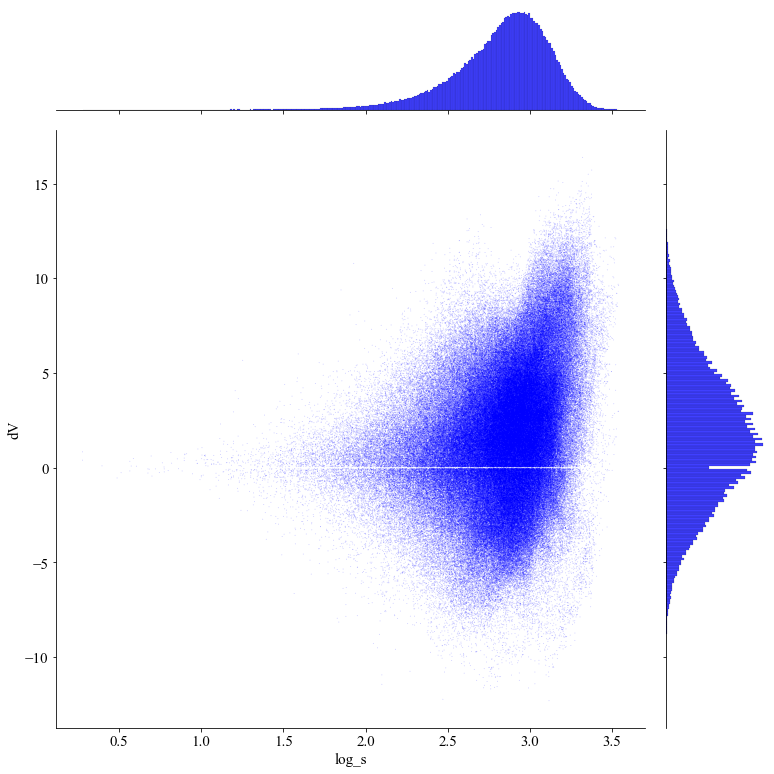

In [22]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.2, s=1, edgecolor='none',color="blue")

ax.fig.set_size_inches(12, 12)

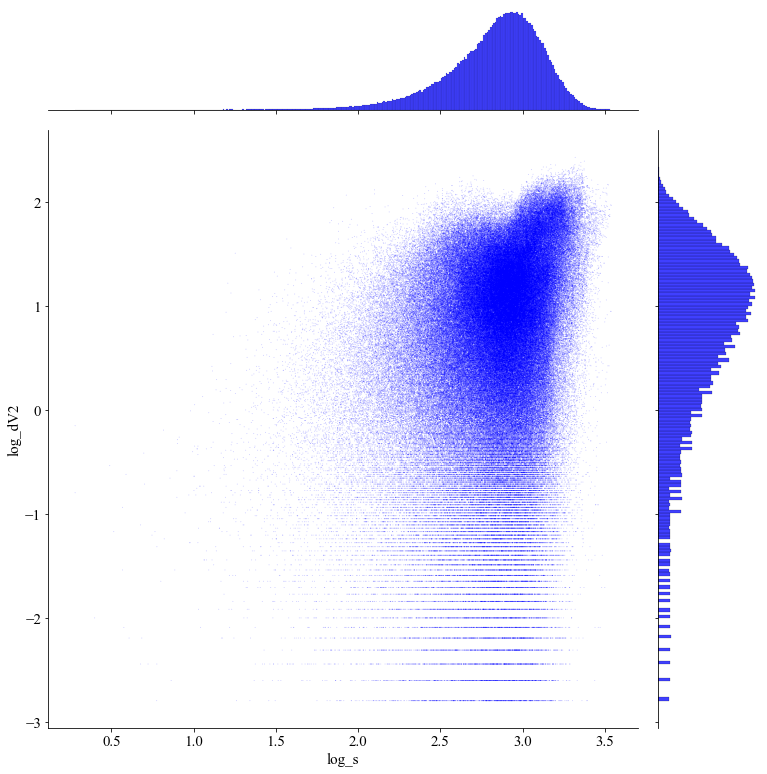

In [23]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.2, s=1, edgecolor='none',color="blue")
ax.fig.set_size_inches(12, 12)

In [24]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [25]:
pairs.s_class[pairs.s_class == 0] = 1

In [26]:
for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
             dV2      log_s
count  17.000000  17.000000
mean    0.139200   0.574487
std     0.185588   0.144444
min     0.003600   0.278866
25%     0.008100   0.513640
50%     0.067600   0.588373
75%     0.193600   0.684262
max     0.705600   0.746366

s_class = 2
              dV2       log_s
count  132.000000  132.000000
mean     0.727779    1.103051
std      2.079452    0.123797
min      0.000000    0.764528
25%      0.047325    1.025696
50%      0.172250    1.138388
75%      0.452275    1.196929
max     16.564900    1.247424

s_class = 3
               dV2        log_s
count  1437.000000  1437.000000
mean      1.848774     1.595382
std       3.767231     0.122647
min       0.000000     1.251207
25%       0.096100     1.514754
50%       0.518400     1.624635
75%       1.849600     1.694814
max     

/Users/will/miniconda3/envs/science/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


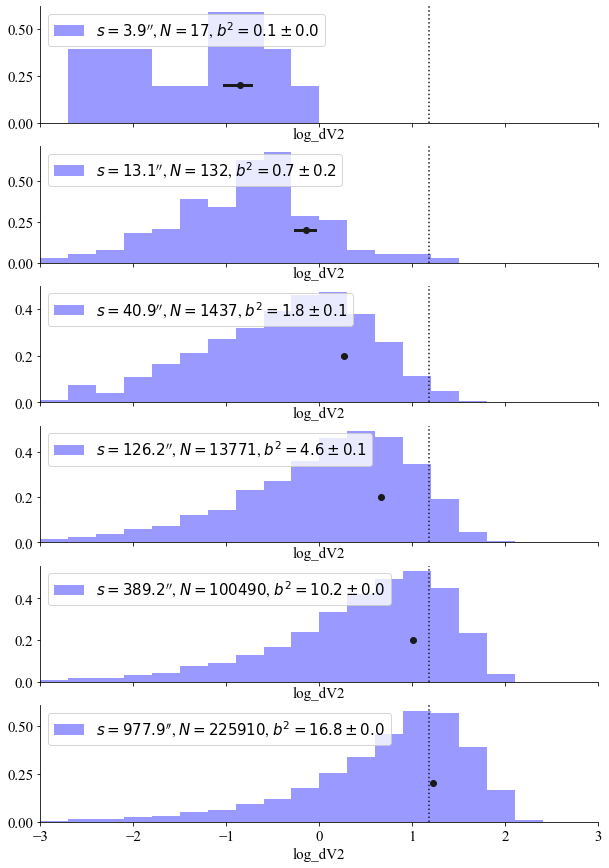

In [27]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20,color="blue", hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [28]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 15.04


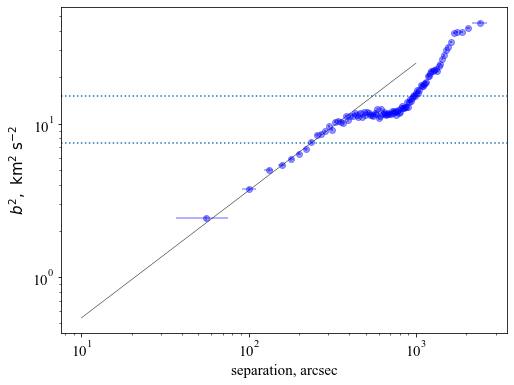

In [29]:
ngroup = 3500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")
sgrid = np.logspace(1.0, 3.0)
ax.plot(sgrid, 0.08*sgrid**(0.83), color="k", lw=0.5)
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

Repeat previous plot, but with uniform logarithmic spacing in `s`.  We use a log spacing of 0.15 as in the grid-based case. 

In [40]:
d_log_s = 0.15
log_s_min = np.min(pairs["log_s"])
ils = ((pairs["log_s"] - log_s_min) / d_log_s).astype(int).rename("ils")
ils

0     1       14
      2       15
      16      17
      17      16
      18      17
              ..
1176  1009    13
      1058    14
      1080    12
      1093    13
      1166    13
Name: ils, Length: 352932, dtype: int64

No we have a vector `ils`, which is the index into the log s grid of each separation. We can use this in `groupby`, but we must *not* sort the pairs:

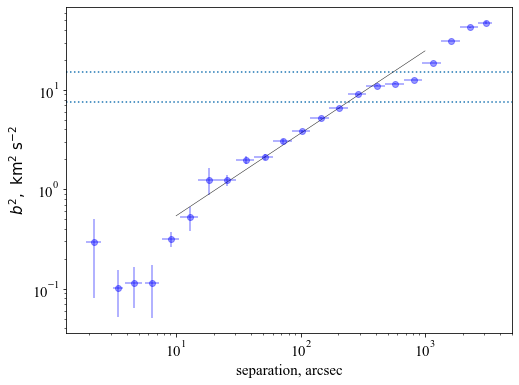

In [41]:
table = pairs[['s', 'dV2']].groupby(ils).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")
sgrid = np.logspace(1.0, 3.0)
ax.plot(sgrid, 0.08*sgrid**(0.83), color="k", lw=0.5)
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [42]:
table

s                                                                  \
       count         mean         std          min          25%          50%   
ils                                                                            
0        3.0     2.099309    0.344358     1.900494     1.900494     1.900494   
1        5.0     3.496551    0.302625     3.084740     3.263175     3.687387   
2        8.0     4.691432    0.484389     3.875903     4.575138     4.792634   
3       10.0     6.323482    0.578091     5.576553     5.957178     6.140280   
4       25.0     9.439742    1.058499     7.673261     8.163698     9.846367   
5       47.0    13.019050    1.293061    10.693180    11.954633    13.001236   
6      105.0    18.006138    1.950455    15.120057    16.470948    17.860085   
7      202.0    25.880603    2.567052    21.337041    23.724893    25.714922   
8      479.0    36.625528    3.733468    30.171439    33.185666    36.755003   
9      921.0    51.741603    5.108641    42.578640    47.323127    52.158608   
10    1863.0    73.153513    7.017613    60.102459    67.043376    73.525753   
11    3567.0   103.181087   10.063897    84.903839    94.473917   103.617081   
12    6804.0   145.811707   14.130307   119.917379   133.844195   146.327948   
13   12647.0   206.333896   20.223839   169.391957   188.859614   207.402501   
14   22826.0   290.846645   28.217077   239.259891   266.708074   291.629558   
15   39927.0   409.575979   40.208389   337.967134   375.021272   410.517397   
16   63135.0   577.574475   56.750954   477.386207   528.808796   578.844691   
17   84637.0   807.485534   79.749580   674.323400   737.945000   804.362052   
18   73406.0  1124.346147  111.395413   952.509224  1027.025376  1113.161240   
19   34811.0  1552.559260  150.219563  1345.451792  1423.242982  1523.893921   
20    7086.0  2129.886808  183.910758  1900.556706  1981.844788  2082.476391   
21     418.0  2900.737446  184.466647  2686.669754  2758.604991  2844.615110   

                                   dV2                                \
             75%          max    count       mean        std     min   
ils                                                                    
0       2.198717     2.496939      3.0   0.291867   0.366069  0.0100   
1       3.687387     3.760064      5.0   0.102360   0.113442  0.0081   
2       4.984194     5.276411      8.0   0.114563   0.143502  0.0036   
3       6.603951     7.292139     10.0   0.112720   0.196073  0.0016   
4      10.301216    10.611242     25.0   0.318500   0.278265  0.0009   
5      14.330450    14.981525     47.0   0.520255   0.961742  0.0000   
6      20.021431    21.301574    105.0   1.248687   3.855658  0.0000   
7      28.418813    30.104490    202.0   1.232297   2.245669  0.0000   
8      40.044017    42.478240    479.0   1.991500   4.174035  0.0001   
9      56.111711    60.092410    921.0   2.120437   3.940623  0.0000   
10     79.133648    84.860319   1863.0   3.038665   6.530987  0.0000   
11    111.910580   119.907904   3567.0   3.819809   6.643119  0.0000   
12    158.179130   169.347456   6804.0   5.192871   8.488174  0.0000   
13    224.139814   239.252907  12647.0   6.554242   9.806892  0.0000   
14    315.592861   337.953485  22826.0   9.073431  13.591741  0.0000   
15    444.420737   477.372224  39927.0  11.015697  15.327397  0.0000   
16    626.786828   674.320514  63135.0  11.569113  14.988712  0.0000   
17    875.291013   952.484903  84637.0  12.535460  15.112922  0.0000   
18   1214.867249  1345.425849  73406.0  18.579511  24.087042  0.0000   
19   1663.247812  1900.486613  34811.0  31.087434  34.184752  0.0000   
20   2240.184051  2683.062904   7086.0  42.959511  40.709530  0.0000   
21   2999.642056  3461.323373    418.0  47.261375  33.271919  0.0009   

                                               
           25%       50%        75%       max  
ils                                            
0     0.085000   0.16000   0.432800    0.7056  
1     0.028900   

In [33]:
table=[s*0.0063,b2,e_s,e_b2]
dfx2=pd.DataFrame(table)
dfx2=dfx2.transpose()
dfx2=dfx2.set_axis(['pc', 'S', 'ErrX', 'ErrY'], axis=1, inplace=False)
dfx2.to_csv('SFdata//Lagoon2.csv',mode = 'w', index=False)

In [34]:
types = ['HD 164536', '7 Sgr', 'Herschel 36', '9 Sgr', 'HD 164816', 'HD 164865', 'M8E-IR', 'HD 165052','HD 165246']
x_coords = [270.6609, 270.7129, 270.9180, 270.9685, 270.9869, 271.0634, 271.2244, 271.2940,271.5195]
y_coords = [-24.2554, -24.2825, -24.3785, -24.3607, -24.3126, -24.1834, -24.4448, -24.3986,-24.1955]

In [35]:
points_of_interest = {
    "HD 164536": [270.6609, -24.2554],
    "7 Sgr": [270.7129, -24.2825],
    "Herschel 36": [270.9180, -24.3785],
    "9 Sgr": [270.9685, -24.3607],
    "HD 164816": [270.9869, -24.3126],
    "HD 164865": [271.0634, -24.1834],
    "M8E-IR": [271.2244, -24.4448],
    "HD 165052": [271.2940, -24.3986],
    "HD 165246": [271.5195, -24.1955],
}
def mark_points(ax):
    for label, c in points_of_interest.items():
        ax.plot(c[0], c[1], marker='+', markersize='12', color='k')

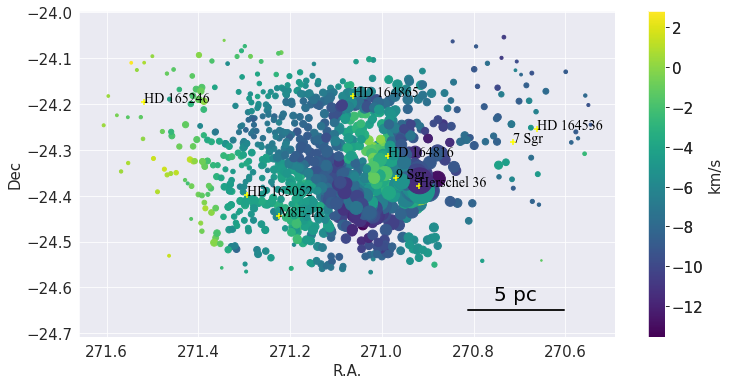

In [36]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 6))
    scat = ax.scatter(df.RAdeg, df.DEdeg, 
                      s=0.0015*((df.NormHalpha)), 
                      c=df.RVHalpha,cmap="viridis" 
                     )
    fig.colorbar(scat, ax=[ax])
    #mark_points(ax)
    #ax.set_facecolor('k')
    #ax.axis('equal')
    ax.set_aspect('equal', 'datalim')
    fig.colorbar(scat, ax=ax).set_label("km/s")

    ax.invert_xaxis()

    ax.text(0.855, 0.1, '5 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
    plt.axhline(y=-24.65, xmin=0.725, xmax=0.905, linewidth=2, color = 'k')

    ax.set(xlabel='R.A.', ylabel='Dec')

    
for i, type_ in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='+', color='yellow')
    plt.text(x, y, type_, fontsize=14)

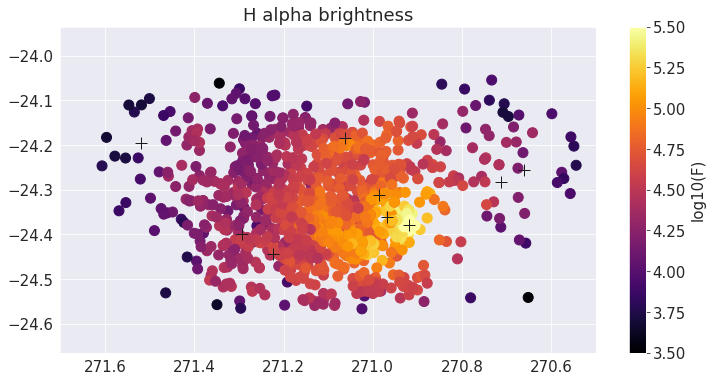

In [37]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 6))
    scat = ax.scatter(df.RAdeg, df.DEdeg, s=100, c=np.log10(df.NormHalpha), cmap='inferno', vmin=3.5, vmax=5.5)
    fig.colorbar(scat, ax=ax).set_label("log10(F)")
    mark_points(ax)
    ax.set_title('H alpha brightness')
    ax.axis('equal')
    ax.axis([270.5, 271.7, -24.6, -24])
    ax.invert_xaxis()

In [38]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 23.694718837738037 seconds ---
